In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
trset = pd.read_csv("train.csv")

In [4]:
trset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def LogisticRegression(labels, data, alpha, epochs):
    m, n = data.shape
    theta = np.random.rand(n)
    for i in range(epochs):
        gradient = 1/m*((np.transpose(sigmoid(data @ theta))-labels) @ data)
        theta -= alpha*gradient
    return theta

In [6]:
y = np.repeat([0,1],50)
X = np.r_[np.random.normal(1,1,(50,2)), np.random.normal(5,1,(50,2))]
theta = LogisticRegression(y, np.c_[np.ones((100,1)), X], alpha = 1, epochs = 400)

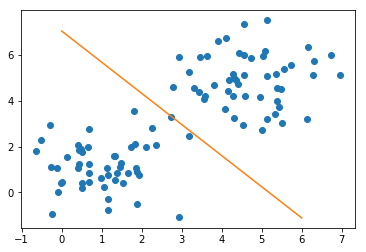

In [7]:
y1 = (-theta[1]*0 - theta[0])/theta[2]
y2 = (-theta[1]*6 - theta[0])/theta[2]
plt.plot(X[:,0],X[:,1], "o")
plt.plot([0,6],[y1,y2])

In [8]:
def LogisticRegressionRegularized(labels, data, alpha, lambada, epochs):
    m, n = data.shape
    theta = np.random.rand(n)
    for i in range(epochs):
        gradient = 1/m*((np.transpose(sigmoid(data @ theta))-labels) @ data) + lambada/m*np.sum(theta)
        theta -= alpha*gradient
    return theta

In [9]:
theta = LogisticRegressionRegularized(y, np.c_[np.ones((100,1)), X], alpha = 1, lambada = 0.11, epochs = 400)

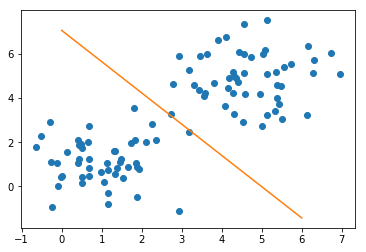

In [10]:
y1 = (-theta[1]*0 - theta[0])/theta[2]
y2 = (-theta[1]*6 - theta[0])/theta[2]
plt.plot(X[:,0],X[:,1], "o")
plt.plot([0,6],[y1,y2])

# Titanic na za tydzień

In [11]:
trset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
training = trset.loc[:,["Pclass","Sex","Age","SibSp","Parch"]]

In [28]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Pclass    891 non-null int64
Sex       891 non-null int64
Age       714 non-null float64
SibSp     891 non-null int64
Parch     891 non-null int64
dtypes: float64(1), int64(4)
memory usage: 34.9 KB


In [42]:
training = training.fillna(training.mean())
labels = trset.loc[:,"Survived"]
training.Sex = pd.factorize(training.Sex)[0]

In [106]:
weights = LogisticRegressionRegularized(labels.values, np.c_[np.ones(training.shape[0]),training.values], 0.01, 4000, 10)

In [110]:
testset = pd.read_csv("test.csv")
test = testset.loc[:,["Pclass","Sex","Age","SibSp","Parch"]]
test.Sex = pd.factorize(test.Sex)[0]
test = test.fillna(test.mean())

In [118]:
result = np.c_[testset.PassengerId, np.around(sigmoid(np.c_[np.ones(test.shape[0]), test.values] @ weights)).astype("int")]
result = pd.DataFrame(result)
result.columns = ["PassengerId","Survived"]
result.to_csv("output.csv",index=False)